In [1]:
import numpy as np
import glob
import os

import matplotlib.pyplot as plt

from scripts_fermions.operators import Hamiltonian, Boost
import yastn
from yastn.tn import mps

In [2]:
g = 1
v, Q = 0.5, 1
N = 512
D = 256
a = 0.125
m = 0.5
#
glob_path = os.path.join(os.path.abspath(""), "./results_fermions/g=1.0000/**/state_t=*.npy")
fnames = glob.glob(glob_path, recursive=True)
fns = sorted([fname for fname in fnames if all(x in fname for x in ["/g=1.0000/", "dt=0.0625", f"{N=}", f"{D=}", f"{a=:0.4f}", f"{m=:0.4f}", f"{v=:0.4f}"])]);

In [4]:
#
ops = yastn.operators.SpinlessFermions(sym='U1', tensordot_policy='no_fusion')
#
glob_path = os.path.join(os.path.abspath(""), "./results_fermions/g=1.0000/**/ex/**/state_D=*.npy")
fnames = glob.glob(glob_path, recursive=True)
fex = sorted([fname for fname in fnames if all(x in fname for x in ["/g=1.0000/", f"{N=}", f"{a=:0.4f}", f"{D=}", f"{m=:0.4f}"])])
#
glob_path = os.path.join(os.path.abspath(""), "./results_fermions/g=1.0000/**/gs/**/state_D=*.npy")
fnames = glob.glob(glob_path, recursive=True)
fgs = sorted([fname for fname in fnames if all(x in fname for x in ["/g=1.0000/", f"{N=}", f"{a=:0.4f}", f"{D=}", f"{m=:0.4f}"])])
#
glob_path = os.path.join(os.path.abspath(""), "./results_fermions/g=1.0000/**/ex/**/state_D=*_boosted.npy")
fnames = glob.glob(glob_path, recursive=True)
fbt = sorted([fname for fname in fnames if all(x in fname for x in ["/g=1.0000/", f"{N=}", f"{a=:0.4f}", f"{m=:0.4f}"])])
#
def fn_mass(fns, **kwargs):
    return [x for x in fns if all( f"{k}={v}" in x for k, v in kwargs.items())][0]
#
d_ex = np.load(fn_mass(fex ), allow_pickle=True).item()
d_gs = np.load(fn_mass(fgs ), allow_pickle=True).item()
d_boost = np.load(fn_mass(fbt), allow_pickle=True).item()


In [5]:
d_ex = np.load(fn_mass(fex, m=m), allow_pickle=True).item()
d_gs = np.load(fn_mass(fgs, m=m), allow_pickle=True).item()
psi_ex = yastn.from_dict(d_ex['psi'])
psi_gs = yastn.from_dict(d_gs['psi'])

H = Hamiltonian(N, m, g, t=0, a=a, v=1, Q=0, ops=ops)
K = Boost(N, m, g, a, ops)

E_ex = mps.vdot(psi_ex, H, psi_ex).real
E_gs = mps.vdot(psi_gs, H, psi_gs).real

In [6]:
ts = np.linspace(0, 48, 25)
psi_t = {t: yastn.from_dict(np.load(fn_mass(fns, t=t), allow_pickle=True).item()['psi']) for t in ts}
chis = [x for x in d_boost['chis'] if x <= 2]
psi_chi = {chi: yastn.from_dict(d_boost['psi'][ii]) for ii, chi in enumerate(chis)}


In [7]:
probs = {}
for t, pt in psi_t.items():
    print(t)
    for chi, pc in psi_chi.items():
        if (t, chi) not in probs:
            probs[t, chi] = np.abs(mps.vdot(pt, pc)) ** 2


0.0
2.0
4.0
6.0
8.0
10.0
12.0
14.0
16.0
18.0
20.0
22.0
24.0
26.0
28.0
30.0
32.0
34.0
36.0
38.0
40.0
42.0
44.0
46.0
48.0


In [9]:
probs_gs = {t: np.abs(mps.vdot(pt, psi_gs)) ** 2 for t, pt in psi_t.items()}

Text(0.5, 1.0, 'N=512  a=0.125 v=0.5')

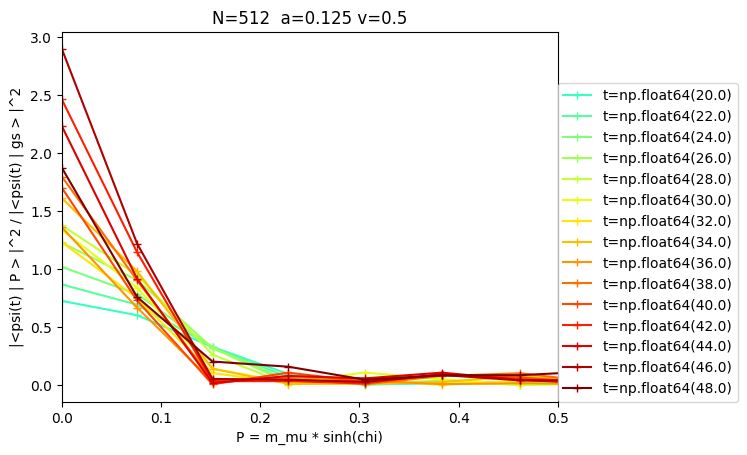

In [11]:
cm = plt.cm.jet
for t in ts[10:]:
    pr = [probs[t, chi] / probs_gs[t] for chi in chis]
    P = np.sinh(chis) * (E_ex - E_gs)
    plt.plot(P, pr, '-+', label=f"{t=}", color = cm(t / ts[-1]))
plt.xlabel('P = m_mu * sinh(chi)')
plt.ylabel("|<psi(t) | P > |^2 / |<psi(t) | gs > |^2")
plt.legend(loc=(1, 0))
plt.xlim([0, 0.5])
plt.title("N=512  a=0.125 v=0.5")
#plt.ylim([1e-4, 1e2])